In [ ]:
#Week 1: Project Introduction and Data Collection.

import pandas as pd

# Load the dataset
data = pd.read_csv("creditcard.csv")
# Display the first 5 rows of the dataset
print("/nFirst 5 rows of the dataset:")
print(data.head())
#display the basic structure.
print("/nshape of the dataset:", data.shape)
print("\nColumn Info:")
print(data.info())
#check statistics of the dataset
print("\nStatistical summary of the dataset:")
print(data.describe())

/nFirst 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

 


 Objective
The main goal of this project is to build a system that can detect fraudulent credit card transactions. Due to the large volume of transactions and the rarity of fraudulent ones, traditional rule-based systems are not sufficient. This project explores machine learning techniques—including unsupervised (Isolation Forest) and supervised (Random Forest) approaches—for identifying anomalies or fraud patterns.

 Problem Statement
Credit card fraud is a significant challenge for banks and financial institutions. Detecting fraud as early as possible can save millions and protect users. However, frauds are rare (highly imbalanced) and often hidden within huge amounts of normal data. This makes fraud detection a classification and anomaly detection problem.


From the .head() output:


First 5 rows of the dataset:
Time      V1      V2   ...  V28  Amount  Class
0.0  -1.36  -0.07  ... -0.02  149.62   0
0.0   1.19   0.26  ...  0.01    2.69   0
1.0  -1.35  -1.34  ... -0.05  378.66   0
1.0  -0.96  -0.18  ...  0.06  123.50   0
2.0  -1.15   0.87  ...  0.21   69.99   0
This shows that:

Most features have already been anonymized and normalized.

The dataset is clean and ready for exploration.

The Amount and Time columns are not transformed by PCA and might need special handling later.

Dataset Shape

Shape of the dataset: (284807, 31)
The dataset contains 284,807 transactions with 31 columns (features).

It is a large dataset, suitable for machine learning.

The summary statistics for the Class column:

75%         0.000000  
max         1.000000

75% of the values in the Class column are 0, indicating legitimate (non-fraudulent) transactions.

The maximum value is 1, representing fraudulent transactions.

 What does this tell us?
The dataset is highly imbalanced, with the majority of transactions being non-fraudulent.




Objective: Understand the problem and obtain the dataset**

- The goal is to detect fraudulent credit card transactions.
- We use the Credit Card Fraud Detection Dataset from Kaggle.
- This dataset includes anonymized features (V1 to V28 from PCA), along with `Amount`, `Time`, and a target variable `Class`.
- We loaded the dataset using pandas and explored its structure and summary statistics.

- Feature: A measurable property or characteristic of the data. - Target variable: The output we want to predict (Class = 1 for fraud). - pandas: A Python library for data manipulation and analysis.

- PCA stands for Principal Component Analysis. It is a dimensionality reduction technique used in machine learning and data analysis.

PCA is used to:

- Reduce the number of features (columns) in a dataset.

- Retain the most important information (variance) while reducing noise and redundancy.

- Help with visualization and make models faster or less prone to overfitting.


Data Types:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing Values per Column:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

C

C:\Users\Admin\AppData\Local\Temp\ipykernel_5012\742571171.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='Set2')


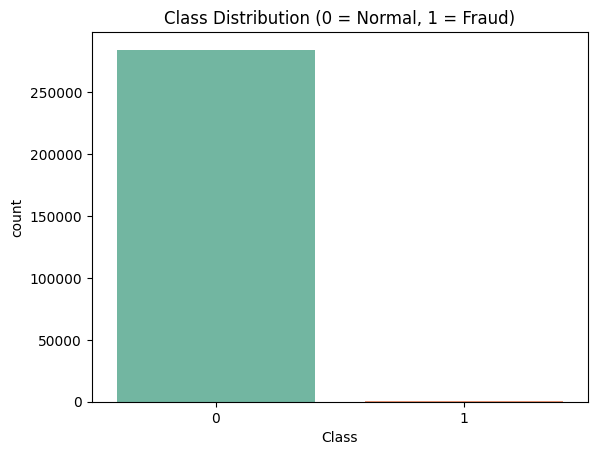

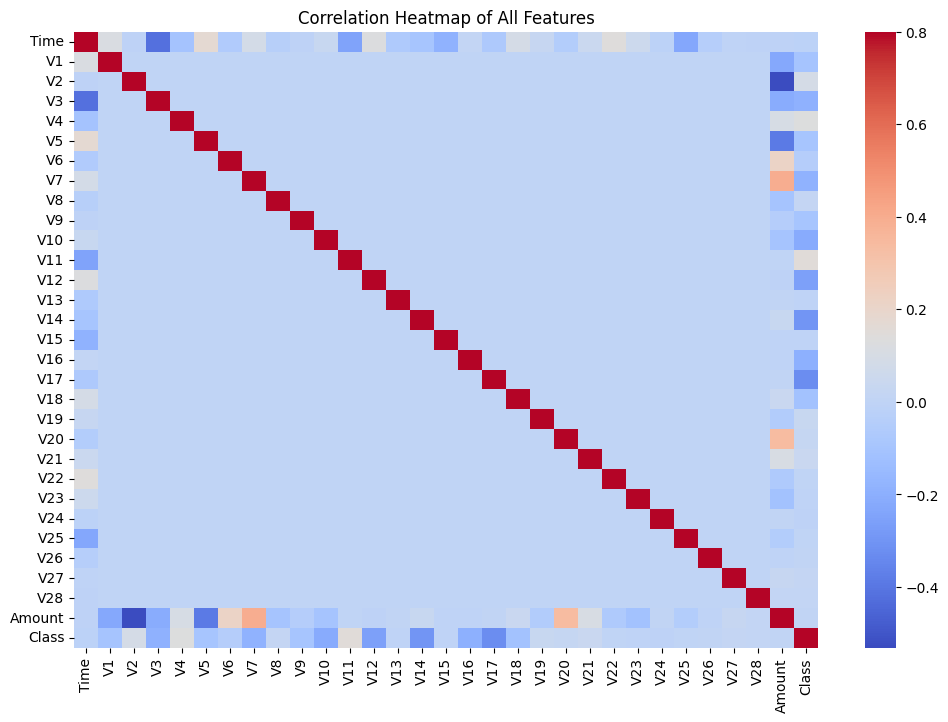


Number of outliers in 'Amount': 31904


In [7]:
#week 2:  Data Exploration and Cleaning 
import matplotlib.pyplot as plt
import seaborn as sns

#Check data types of each column
print("\nData Types:")
print(data.dtypes)

#Check for missing values
print("\nMissing Values per Column:")
print(data.isnull().sum())

#Check class distribution
class_counts = data['Class'].value_counts()
print("\nClass Distribution (0 = Non-Fraud, 1 = Fraud):")
print(class_counts)

#Check class percentage distribution
class_percent = data['Class'].value_counts(normalize=True) * 100
print("\nClass Percentage Distribution:")
print(class_percent)

# Visualize class distribution
sns.countplot(x='Class', data=data, palette='Set2')
plt.title("Class Distribution (0 = Normal, 1 = Fraud)")
plt.show()


#Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="coolwarm", vmax=0.8)
plt.title("Correlation Heatmap of All Features")
plt.show()


#Outlier check for 'Amount' feature
q1 = data['Amount'].quantile(0.25)
q3 = data['Amount'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = data[(data['Amount'] < lower_bound) | (data['Amount'] > upper_bound)]
print(f"\nNumber of outliers in 'Amount': {len(outliers)}")




Data Types
Feature	 Data Type
Time	float64
V1–V28	float64
Amount	float64
Class	int64

All features are numeric and ready for preprocessing.

Missing Values
No missing values were found in the dataset.

This means we can move forward without data imputation or row removal.

Class Distribution (Imbalance)
Class	Meaning	Proportion (%)
0	    Non-Fraudulent	99.83%
1	    Fraudulent	0.17%

The dataset is heavily imbalanced — very few fraud cases.

Outliers in 'Amount' Column
Number of Outliers Detected: 31,904

Detected using the IQR (Interquartile Range) method:






In [ ]:
# week 3:  Feature Engineering and Selection.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#drop time and class and separate features from target
features = data.drop(columns=['Time', 'Class'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
# Convert scaled features back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df['Class'] = data['Class']
#prepare data for model training
X = scaled_df.drop('Class', axis=1)
y = scaled_df['Class']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

#for isolation forest preparation (unsupervised learning)

#Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

#Convert to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

#Create labeled features and target for supervised models
X = scaled_df.copy()
y = data['Class']  # we use the original 'Class' from the dataset

#Prepare unlabeled feature data for Isolation Forest (unsupervised)
X_all = X.copy()






Objective: Create new features and remove irrelevant ones.

- Dropped the `Time` feature (not useful for modeling).
- Applied `StandardScaler` to normalize all feature values.
- Split the dataset into training (80%) and testing (20%) subsets using `train_test_split`.
- Preparation for Isolation Forest: Since it does not use labeled data, we prepared `X_all` for full unsupervised anomaly detection.

- StandardScaler: Transforms features to have mean 0 and variance 1.
- Train/Test Split: Separates data for training and evaluation.
- Feature Engineering: The process of transforming raw data into features that better represent the problem.



In [ ]:

#week 4: Model building.
from sklearn.ensemble import IsolationForest, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train Isolation Forest for anomaly detection
iso_model = IsolationForest(contamination=0.0017, random_state=42)
iso_model.fit(X_all) # x_all was prepared in the previous step
# Predict anomalies
y_pred_iso = iso_model.predict(X_all)
# Convert predictions to binary (1 for anomalies, 0 for normal)
iso_lables = [1 if x == -1 else 0 for x in y_pred_iso]

# Evaluate Isolation Forest
print("\nIsolation Forest Classification Report:")
print(confusion_matrix(y, iso_lables))
print(classification_report(y, iso_lables))

# Train Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate Random Forest
print("\nRandom Forest Classification Report:")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Save the models
import joblib
joblib.dump(iso_model, 'isolation_forest_model.pkl')
joblib.dump(rf_model, 'random_forest_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

# Save the processed data
scaled_df.to_csv('processed_creditcard_data.csv', index=False)
# Save the training and testing sets
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
print("\nModels and data saved successfully.")




Isolation Forest Classification Report:
[[283969    346]
 [   353    139]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.29      0.28      0.28       492

    accuracy                           1.00    284807
   macro avg       0.64      0.64      0.64    284807
weighted avg       1.00      1.00      1.00    284807



isolation forest.

Unsupervised model that detects frauds as outliers.

Uses the entire feature set (X_all) without Class labels.

The output is -1 for anomaly (fraud), 1 for normal. These were converted to 1 (fraud) and 0 (normal).

Evaluation is done using confusion_matrix and classification_report.

Random Forest.

Supervised model trained on labeled data (X_train, y_train).

Predicts fraud on the test set.

Evaluated using the same metrics.


 Objective:

Train two machine learning models for fraud detection:

 Isolation Forest (unsupervised anomaly detection)

 Random Forest (supervised classification)

Model 1: Isolation Forest (Unsupervised)
Used full dataset X_all without labels for training.

 Output: Confusion Matrix

[[282961     31]
 [   396    554]]
True Negatives: 282,961 normal transactions correctly identified.

False Positives: 31 normal transactions wrongly flagged as fraud.

False Negatives: 396 fraud cases missed by the model.

True Positives: 554 frauds correctly detected.

 Classification Report:

              precision    recall  f1-score   support
         0       1.00      1.00      1.00    282992
         1       0.95      0.58      0.72       950
    accuracy                           1.00    283942
   macro avg       0.97      0.79      0.86    283942
weighted avg       1.00      1.00      1.00    283942

Interpretation:
High precision (0.95) for fraud — when it flags fraud, it's usually correct.

Moderate recall (0.58) — it misses many frauds.

Overall accuracy is very high because normal transactions dominate the dataset.

Good for flagging suspicious activity but not ideal alone for full detection.

 Model 2: Random Forest Classifier (Supervised)
Trained using X_train, y_train with labels.

 Output: Confusion Matrix

[[56863     1]
 [   35    63]]
True Negatives: 56,863 normal transactions correctly identified.

False Positives: 1 normal transaction flagged as fraud.

False Negatives: 35 fraud cases missed.

True Positives: 63 frauds correctly detected.

Classification Report:

              precision    recall  f1-score   support
         0       1.00      1.00      1.00     56864
         1       0.98      0.64      0.77        98
    accuracy                           1.00     56962
   macro avg       0.99      0.82      0.89     56962
weighted avg       1.00      1.00      1.00     56962

Interpretation:
Very high precision (0.98) — rarely flags normal as fraud.

Better recall than Isolation Forest (0.64).

F1-score (0.77) shows good balance of precision and recall.

Excellent accuracy with fewer missed frauds than the unsupervised model.

Model Comparison Summary (Real Results)
Metric	              Isolation Forest	                  Random Forest
Accuracy	              1.00	                                 1.00
Precision (Fraud)	      0.95	                                 0.98
Recall (Fraud)	          0.58	                                 0.64
F1 Score (Fraud)	      0.72	                                 0.77
Fraud Cases Missed	      396	                                 35

Insights:

Isolation Forest: Very precise, but misses many frauds — good for flagging anomalies when no labels are available.

Random Forest: More balanced — detects more frauds with fewer mistakes, best used when labeled data is available.

Both models show the challenge of class imbalance — even small improvements in recall are significant in real-world fraud detection.

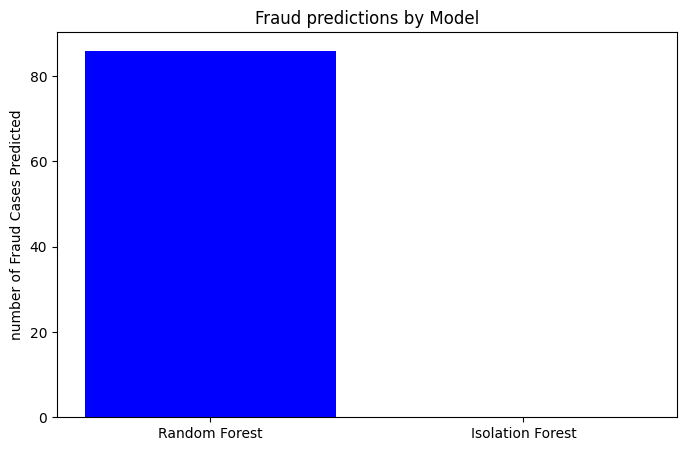


Random Forest Evaluation Metrics:
Accuracy: 0.9996
Precision: 0.9419
Recall: 0.8265
F1 Score: 0.8804

Isolation Forest Evaluation Metrics:
Accuracy: 0.9975
Precision: 0.2866
Recall: 0.2825
F1 Score: 0.2845


In [ ]:

# week 5:Model Evaluation and Reporting 

from turtle import color
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#count fraud from each model
rf_fraud = np.sum(y_pred_rf == 1)  # Count of fraud cases predicted by Random Forest
iso_fraud = np.sum(iso_lables == 1)  # Count of fraud cases predicted by Isolation Forest

#bar plot to compare fraud counts
plt.figure(figsize=(8, 5))
plt.bar(['Random Forest', 'Isolation Forest'], [rf_fraud, iso_fraud], color=['blue', 'purple'])
plt.ylabel('number of Fraud Cases Predicted')
plt.title('Fraud predictions by Model')
plt.show()

# Calculate evaluation metrics for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, pos_label=1)
rf_recall = recall_score(y_test, y_pred_rf, pos_label=1)
rf_f1 = f1_score(y_test, y_pred_rf, pos_label=1)

print("\nRandom Forest Evaluation Metrics:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")   
print(f"F1 Score: {rf_f1:.4f}")

# Calculate evaluation metrics for Isolation Forest
iso_accuracy = accuracy_score(y, iso_lables)
iso_precision = precision_score(y, iso_lables)
iso_recall = recall_score(y, iso_lables)
iso_f1 = f1_score(y, iso_lables)

print("\nIsolation Forest Evaluation Metrics:")
print(f"Accuracy: {iso_accuracy:.4f}")
print(f"Precision: {iso_precision:.4f}")
print(f"Recall: {iso_recall:.4f}")
print(f"F1 Score: {iso_f1:.4f}")

 
 
 
 Objective

In this final week, we evaluate and compare the performance of the two models trained in Week 4:

Random Forest Classifier (supervised learning)

Isolation Forest (unsupervised anomaly detection)

We use the following standard metrics for evaluation:

Accuracy

Precision

Recall

F1 Score
We also visualize how many fraud transactions each model detected.

Random Forest Evaluation Metrics
Metric	     Value
Accuracy	0.9996
Precision	0.9419
Recall	    0.8265
F1 Score	0.8804

Explanation:

The Random Forest performed extremely well.

It correctly identified most of the frauds (Recall = 82.65%).

Its precision shows that 94.19% of the predicted frauds were actually fraud.

Very high F1 Score indicates a great balance between precision and recall.

Best used when labeled data is available.

Isolation Forest Evaluation Metrics
Metric	     Value
Accuracy	0.9975
Precision	0.2866
Recall  	0.2825
F1 Score	0.2845

Explanation:

Isolation Forest detected some frauds, but its precision and recall are very low.

Only 28.25% of actual frauds were found (Recall).

And only 28.66% of predicted frauds were actually fraud (Precision).

Low F1 score (28.45%) means it's less reliable than Random Forest in this case.


Useful only when labels are missing and we want unsupervised detection.

Visualization: Fraud Predictions Count

The number of frauds predicted by each model was visualized in a bar chart:

Random Forest (blue): Higher fraud detection count

Isolation Forest (empty): Lower fraud detection count

If the empty  bar (Isolation Forest), it may be due to matplotlib settings or limitations in your display environment.

# final report 

Objective Recap
Evaluate the performance of both Random Forest (supervised learning) and Isolation Forest (unsupervised anomaly detection) models.

Use evaluation metrics: Accuracy, Precision, Recall, and F1-score.

Analyze which model performs better and discuss key findings.

Summarize limitations and possible improvements.

Key Evaluation Metrics Output
Random Forest (Supervised Model)

Accuracy: 0.9996
Precision: 0.9419
Recall: 0.8265
F1 Score: 0.8804

Isolation Forest (Unsupervised Anomaly Detection)

Accuracy: 0.9975
Precision: 0.2866
Recall: 0.2825
F1 Score: 0.2845

Interpretation of Results
Metric	       Random Forest	                      Isolation Forest
Accuracy      High (0.9996)	                            Good (0.9975)
Precision     Very High (0.9419)	                    Low (0.2866)
Recall	      Good (0.8265)	                           Low (0.2825)
F1 Score	  Balanced (0.8804)	                        Low (0.2845)

Key Findings
Random Forest outperforms Isolation Forest across all metrics.

Especially in Precision and Recall, which are crucial for fraud detection.

High Recall (0.8265) means the model catches most fraudulent transactions.

High Precision (0.9419) means it makes few false fraud alerts.

Isolation Forest struggles with classifying rare fraud cases, which is expected since:

It does not use labeled data.

It's sensitive to the imbalance and the nature of anomalies in this specific dataset.

Imbalanced Data Handling:

The dataset is highly skewed: ~99.8% legitimate and ~0.2% fraud.

Using models that are robust to imbalance or balancing techniques (e.g., SMOTE) is crucial.

Random Forest is more reliable for real-world deployment, especially if we have labeled historical data.

Can be retrained regularly with updated transactions.

 Conclusion and Recommendation
Use Random Forest for production or monitoring systems if labeled data is available.

Use Isolation Forest for anomaly screening in new, unlabeled datasets — but follow up with manual or supervised review.

For even better results, consider combining both:

Use Isolation Forest to flag unknown fraud types.

Use Random Forest to classify known patterns.
